Spotify API Project :

In [12]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import base64
import requests 


client_id = 'cf12902fe8ab46ac9388d4cfe86e5438'
client_secret = '28ccfdf594d44bfc8a1529ca4d0df0ce'
redirect = 'http://localhost:3000'

client_creds = f'{client_id}:{client_secret}'
client_creds.encode()
client_creds_b64 = base64.b64encode(client_creds.encode())

token_url = "https://accounts.spotify.com/api/token"
method = "POST"
token_data = {
    "grant_type": "client_credentials"
}
token_headers = {
    "Authorization": f"Basic {client_creds_b64.decode()}"
}


In [13]:
r = requests.post(token_url, data=token_data, headers=token_headers)
print(r.json()) # Access token here

{'access_token': 'BQCkAFawfZZa5yEphrG_LhchVfNLTZmBFVpIXNvI-Sylrt0FskpIo6cWGBeCbxrqFakOF5_0QeGKJzNm1KpyWQ7XeYKSndXNKQgDMANGzr_cWa36BeTA', 'token_type': 'Bearer', 'expires_in': 3600}


In [14]:
def get_auth_header(token):
    return {"Authorization": "Bearer " + token }

In [15]:
auth_manager = SpotifyOAuth(client_id=client_id, client_secret=client_secret, redirect_uri=redirect, scope='user-library-read')

sp = spotipy.Spotify(auth_manager=auth_manager)

# Use the Spotipy client to get the user's saved tracks
results = sp.current_user_saved_tracks(limit=50) # limit = # of tracks to return

artist = []
song_name = []

# Print the name of each saved track
for item in results['items']:
    track = item['track']

    track_name = track['name']
    song_name.append(track_name)

    artist_name = track['artists'][0]['name']
    artist.append(artist_name)

    album_name = track['album']['name']
    preview = track['preview_url']

    display(f'{track_name} : {artist_name} : {album_name} -> {preview}')

df = pd.DataFrame(song_name, artist)
df.columns=['Track Name']

# New list to store audio features of the track
audio_features_list = []

for item in results['items']:
    track_id = item['track']['id']
    audio_features = sp.audio_features(track_id)
    audio_features_list.append(audio_features[0])

    df1 = pd.DataFrame(audio_features_list) # Dataframe to display audio features of the song
    

display(df)
display(df1)

'Wind Of Change : Scorpions : Crazy World -> None'

'Hey You : Pink Floyd : The Wall -> https://p.scdn.co/mp3-preview/c8c68f809b8dcfba40882bb3611e916eb6ba3e4a?cid=cf12902fe8ab46ac9388d4cfe86e5438'

'Bohemian Rhapsody - Remastered 2011 : Queen : A Night At The Opera (Deluxe Remastered Version) -> None'

'Ella No Dice Nada : Facundo Cabral : Facundo Cabral-Los Elegidos -> https://p.scdn.co/mp3-preview/7647e9248c723684ea7704c1f6055ba72a27cca0?cid=cf12902fe8ab46ac9388d4cfe86e5438'

'Esas Manos : Facundo Cabral : Esenciales -> https://p.scdn.co/mp3-preview/227e1ea4f29106b246fff2bbb8c9af6b8fdc12d9?cid=cf12902fe8ab46ac9388d4cfe86e5438'

,Track Name
Scorpions,Wind Of Change
Pink Floyd,Hey You
Queen,Bohemian Rhapsody - Remastered 2011
Facundo Cabral,Ella No Dice Nada
Facundo Cabral,Esas Manos


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.452,0.524,0,-10.108,1,0.0351,0.315,0.000000,0.103,0.246,151.505,audio_features,3ovjw5HZZv43SxTwApooCM,spotify:track:3ovjw5HZZv43SxTwApooCM,https://api.spotify.com/v1/tracks/3ovjw5HZZv43...,https://api.spotify.com/v1/audio-analysis/3ovj...,312360,4
1,0.587,0.302,0,-14.976,1,0.0293,0.223,0.002160,0.128,0.190,112.460,audio_features,7F02x6EKYIQV3VcTaTm7oN,spotify:track:7F02x6EKYIQV3VcTaTm7oN,https://api.spotify.com/v1/tracks/7F02x6EKYIQV...,https://api.spotify.com/v1/audio-analysis/7F02...,278441,4
2,0.392,0.402,0,-9.961,0,0.0536,0.288,0.000000,0.243,0.228,143.883,audio_features,7tFiyTwD0nx5a1eklYtX2J,spotify:track:7tFiyTwD0nx5a1eklYtX2J,https://api.spotify.com/v1/tracks/7tFiyTwD0nx5...,https://api.spotify.com/v1/audio-analysis/7tFi...,354320,4
3,0.484,0.101,7,-11.823,1,0.0310,0.955,0.000005,0.114,0.216,87.443,audio_features,6CD0dbEkZjiP6ViH6l3pSf,spotify:track:6CD0dbEkZjiP6ViH6l3pSf,https://api.spotify.com/v1/tracks/6CD0dbEkZjiP...,https://api.spotify.com/v1/audio-analysis/6CD0...,239955,4
4,0.375,0.400,4,-6.705,1,0.0323,0.832,0.000008,0.241,0.434,82.904,audio_features,7ciqHG9IkYsskK7euk7PfJ,spotify:track:7ciqHG9IkYsskK7euk7PfJ,https://api.spotify.com/v1/tracks/7ciqHG9IkYss...,https://api.spotify.com/v1/audio-analysis/7ciq...,209027,4


In [16]:
import plotly.express as px
fig = px.bar(df, x = artist, color_discrete_sequence=['teal'], title= 'Arists in my Top 50 Liked Songs',pattern_shape='Track Name')
display(fig)

In [30]:
print(df.dtypes)


Track Name    object
dtype: object


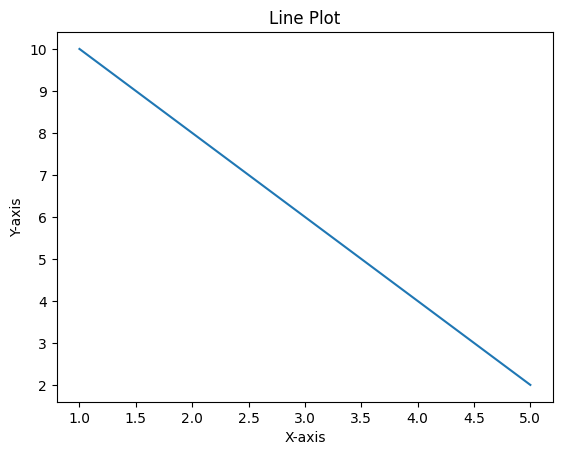

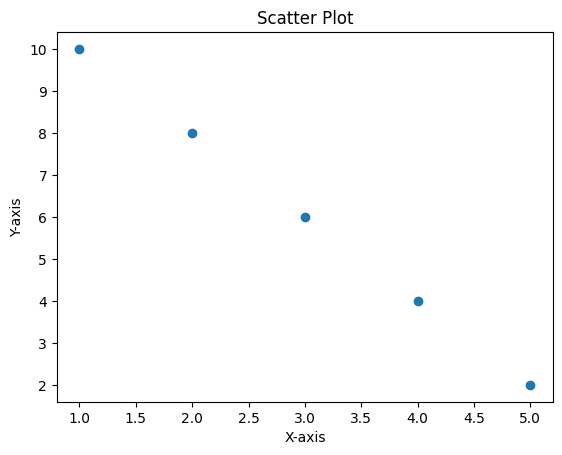

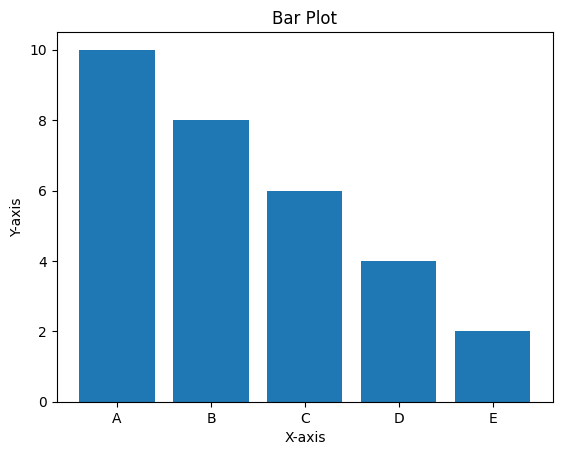

In [32]:
import matplotlib.pyplot as plt

# Line plot
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]
plt.plot(x, y)
plt.title("Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Scatter plot
x = [1, 2, 3, 4, 5]
y = [10, 8, 6, 4, 2]
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

# Bar plot
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 8, 6, 4, 2]
plt.bar(x, y)
plt.title("Bar Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
